In [1]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
from nltk.tag import pos_tag

In [2]:
response =  urllib.request.urlopen('https://www.metacritic.com/game/playstation-4/fallout-76/user-reviews?page=1')
html = response.read()
print(html)

HTTPError: HTTP Error 403: Forbidden

In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
text=text.lower()
print(text)

read user reviews and submit your own for fallout 76 on playstation 4 - page 2 - metacritic(function(a){
        var w=window,b='cbsoptanon',q='cmd',r='config';
        w[b] = w[b] ? w[b] : {};
        w[b][q] = w[b][q] ? w[b][q] : [];
        w[b][r] = w[b][r] ? w[b][r] : [];

        a.foreach(function(z){
            w[b][z] = w[b][z] || function(){
                var c=arguments;
                w[b][q].push(function(){
                    w[b][z].apply(w[b],c);
                })
            }
        });
    })(["oniframesready","onformsready","onscriptsready","onadsready"]);

    //add configs
    window.cbsoptanon.config.push({
        setnpaonconsentchange: true,
        eumaxattempts: 25,
        countrycodemaxattempts: 25,
        onetrusttimeout: 2000,
        enableservices: false
    });

    //load iframes as soon as ready
    window.cbsoptanon.oniframesready(function(_cbsoptanon) {
        console.log('loading iframes');
        _cbsoptanon.tags.load("iframe");
    });

In [10]:
tokens = [t for t in text.split()]
print(tokens)

['read', 'user', 'reviews', 'and', 'submit', 'your', 'own', 'for', 'fallout', '76', 'on', 'playstation', '4', '-', 'page', '2', '-', 'metacritic(function(a){', 'var', "w=window,b='cbsoptanon',q='cmd',r='config';", 'w[b]', '=', 'w[b]', '?', 'w[b]', ':', '{};', 'w[b][q]', '=', 'w[b][q]', '?', 'w[b][q]', ':', '[];', 'w[b][r]', '=', 'w[b][r]', '?', 'w[b][r]', ':', '[];', 'a.foreach(function(z){', 'w[b][z]', '=', 'w[b][z]', '||', 'function(){', 'var', 'c=arguments;', 'w[b][q].push(function(){', 'w[b][z].apply(w[b],c);', '})', '}', '});', '})(["oniframesready","onformsready","onscriptsready","onadsready"]);', '//add', 'configs', 'window.cbsoptanon.config.push({', 'setnpaonconsentchange:', 'true,', 'eumaxattempts:', '25,', 'countrycodemaxattempts:', '25,', 'onetrusttimeout:', '2000,', 'enableservices:', 'false', '});', '//load', 'iframes', 'as', 'soon', 'as', 'ready', 'window.cbsoptanon.oniframesready(function(_cbsoptanon)', '{', "console.log('loading", "iframes');", '_cbsoptanon.tags.load("i

In [11]:
#REMOVE STOP WORDS
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)

In [18]:
#REMOVE SPECIAL CHARACTERS
clean_special_tokens = clean_tokens[:]
for token in clean_tokens:
    if token.isalnum()==False:
        clean_special_tokens.remove(token)

print(clean_special_tokens)

['read', 'user', 'reviews', 'submit', 'fallout', '76', 'playstation', '4', 'page', '2', 'var', 'var', 'configs', 'false', 'iframes', 'soon', 'ready', 'function', 'onready', 'onready', 'var', 'opt', 'categories', 'need', 'check', 'allowed', 'current', 'state', 'categories', 'var', 'checkstate', 'function', 'var', 'obj', 'social', 'else', 'waiting', 'ready', 'fire', 'callback', 'function', 'add', 'scripts', 'page', 'function', 'set', 'googletag', 'cmd', 'queue', 'init', 'disabling', 'initial', 'load', 'var', 'play', 'onerror', 'xhrs', 'addeventlistener', 'setinterval', 'max', 'errors', 'sent', 'per', 'page', 'var', 'text', 'return', 'party', 'script', 'error', 'timeout', 'load', 'timeout', 'var', 'function', 'new', 'else', 'try', 'doc', 'dom', 'doc', 'var', 'js', 'ads', 'google', 'analytics', 'function', 'function', 'var', 'googletag', 'googletag', 'function', 'var', 'var', 'var', 'video', 'game', 'new', 'upcomingsee', 'reportsgames', 'homenew', 'releasescoming', 'soonbest', 'games', 'ye

In [40]:
#REMOVE SPECIAL LIST OF WORDS
my_list = ['game','games', 'fallout', '76','bethesda','found','helpfulall','play','station','4','even','user','users','reviews','revies','playstation','pc','xbox']
clean_tokens_final = clean_special_tokens[:]
for token in clean_special_tokens:
    if token in my_list:
        clean_tokens_final.remove(token)

print(clean_tokens_final)

['read', 'submit', 'page', '2', 'var', 'var', 'configs', 'false', 'iframes', 'soon', 'ready', 'function', 'onready', 'onready', 'var', 'opt', 'categories', 'need', 'check', 'allowed', 'current', 'state', 'categories', 'var', 'checkstate', 'function', 'var', 'obj', 'social', 'else', 'waiting', 'ready', 'fire', 'callback', 'function', 'add', 'scripts', 'page', 'function', 'set', 'googletag', 'cmd', 'queue', 'init', 'disabling', 'initial', 'load', 'var', 'onerror', 'xhrs', 'addeventlistener', 'setinterval', 'max', 'errors', 'sent', 'per', 'page', 'var', 'text', 'return', 'party', 'script', 'error', 'timeout', 'load', 'timeout', 'var', 'function', 'new', 'else', 'try', 'doc', 'dom', 'doc', 'var', 'js', 'ads', 'google', 'analytics', 'function', 'function', 'var', 'googletag', 'googletag', 'function', 'var', 'var', 'var', 'video', 'new', 'upcomingsee', 'reportsgames', 'homenew', 'releasescoming', 'soonbest', 'yearbest', 'timebest', 'genrebest', 'new', 'gamesnew', 'free', 'favorite', 'new', '

In [50]:
#Lemmatize the text so as to get its root form eg: functions,funtionality as function
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_tokens_final]
print (lemmatized_word)

['read', 'submit', 'page', '2', 'var', 'var', 'configs', 'false', 'iframes', 'soon', 'ready', 'function', 'onready', 'onready', 'var', 'opt', 'category', 'need', 'check', 'allowed', 'current', 'state', 'category', 'var', 'checkstate', 'function', 'var', 'obj', 'social', 'else', 'waiting', 'ready', 'fire', 'callback', 'function', 'add', 'script', 'page', 'function', 'set', 'googletag', 'cmd', 'queue', 'init', 'disabling', 'initial', 'load', 'var', 'onerror', 'xhrs', 'addeventlistener', 'setinterval', 'max', 'error', 'sent', 'per', 'page', 'var', 'text', 'return', 'party', 'script', 'error', 'timeout', 'load', 'timeout', 'var', 'function', 'new', 'else', 'try', 'doc', 'dom', 'doc', 'var', 'j', 'ad', 'google', 'analytics', 'function', 'function', 'var', 'googletag', 'googletag', 'function', 'var', 'var', 'var', 'video', 'new', 'upcomingsee', 'reportsgames', 'homenew', 'releasescoming', 'soonbest', 'yearbest', 'timebest', 'genrebest', 'new', 'gamesnew', 'free', 'favorite', 'new', 'favorite

In [52]:
#stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form
snowball_stemmer = SnowballStemmer('english')
stemmed_word = [snowball_stemmer.stem(word) for word in lemmatized_word]
print (stemmed_word)

['read', 'submit', 'page', '2', 'var', 'var', 'config', 'fals', 'ifram', 'soon', 'readi', 'function', 'onreadi', 'onreadi', 'var', 'opt', 'categori', 'need', 'check', 'allow', 'current', 'state', 'categori', 'var', 'checkstat', 'function', 'var', 'obj', 'social', 'els', 'wait', 'readi', 'fire', 'callback', 'function', 'add', 'script', 'page', 'function', 'set', 'googletag', 'cmd', 'queue', 'init', 'disabl', 'initi', 'load', 'var', 'onerror', 'xhrs', 'addeventlisten', 'setinterv', 'max', 'error', 'sent', 'per', 'page', 'var', 'text', 'return', 'parti', 'script', 'error', 'timeout', 'load', 'timeout', 'var', 'function', 'new', 'els', 'tri', 'doc', 'dom', 'doc', 'var', 'j', 'ad', 'googl', 'analyt', 'function', 'function', 'var', 'googletag', 'googletag', 'function', 'var', 'var', 'var', 'video', 'new', 'upcomingse', 'reportsgam', 'homenew', 'releasescom', 'soonbest', 'yearbest', 'timebest', 'genrebest', 'new', 'gamesnew', 'free', 'favorit', 'new', 'favorit', 'onexbox', 'seri', 'xstadiaswi

read:5
submit:1
page:5
2:9
var:21
config:1
fals:1
ifram:1
soon:11
readi:2
function:14
onreadi:2
opt:4
categori:2
need:14
check:1
allow:2
current:3
state:6
checkstat:1
obj:1
social:1
els:5
wait:8
fire:4
callback:1
add:5
script:2
set:3
googletag:3
cmd:1
queue:1
init:1
disabl:1
initi:7
load:3
onerror:1
xhrs:1
addeventlisten:1
setinterv:1
max:1
error:2
sent:1
per:2
text:1
return:3
parti:1
timeout:2
new:44
tri:12
doc:2
dom:1
j:2
ad:3
googl:1
analyt:1
video:5
upcomingse:1
reportsgam:1
homenew:10
releasescom:6
soonbest:6
yearbest:12
timebest:11
genrebest:1
gamesnew:1
free:7
favorit:5
onexbox:2
seri:10
xstadiaswitchiospclegacytop:1
right:16
now89xenoblad:1
definit:4
edition84valorant83command:1
conquer:1
remast:3
collection82clubhous:1
51:1
worldwid:1
classics63disintegrationback:1
platformsps4ps4:1
releas:35
ps4come:1
ps4best:1
ps4:15
gamesbest:8
genreback:8
platformsps5ps5:1
ps5come:1
ps5best:1
ps5:4
platformsxbox:2
one:26
onecom:1
onebest:1
xxbox:1
x:6
xcome:1
xbest:1
platformsstadiastadia:

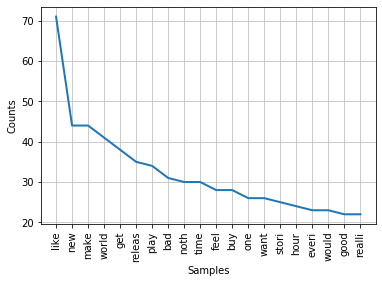

In [53]:
freq = nltk.FreqDist(stemmed_word)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

The words alone itself doesn´t seem to bring any useful data (it appears that the gamie is good bases on like being the most used word)

# Aanalize the data in bigrams and trigrams

In [54]:
pairs=list(nltk.bigrams(stemmed_word))
print(pairs)

[('read', 'submit'), ('submit', 'page'), ('page', '2'), ('2', 'var'), ('var', 'var'), ('var', 'config'), ('config', 'fals'), ('fals', 'ifram'), ('ifram', 'soon'), ('soon', 'readi'), ('readi', 'function'), ('function', 'onreadi'), ('onreadi', 'onreadi'), ('onreadi', 'var'), ('var', 'opt'), ('opt', 'categori'), ('categori', 'need'), ('need', 'check'), ('check', 'allow'), ('allow', 'current'), ('current', 'state'), ('state', 'categori'), ('categori', 'var'), ('var', 'checkstat'), ('checkstat', 'function'), ('function', 'var'), ('var', 'obj'), ('obj', 'social'), ('social', 'els'), ('els', 'wait'), ('wait', 'readi'), ('readi', 'fire'), ('fire', 'callback'), ('callback', 'function'), ('function', 'add'), ('add', 'script'), ('script', 'page'), ('page', 'function'), ('function', 'set'), ('set', 'googletag'), ('googletag', 'cmd'), ('cmd', 'queue'), ('queue', 'init'), ('init', 'disabl'), ('disabl', 'initi'), ('initi', 'load'), ('load', 'var'), ('var', 'onerror'), ('onerror', 'xhrs'), ('xhrs', 'a

In [55]:
cfd = nltk.ConditionalFreqDist(pairs)
cfd['like']

FreqDist({'like': 4, 'absolut': 3, 'play': 3, 'miss': 2, 'studio': 2, 'came': 2, 'multiplay': 2, 'discourag': 2, 'turn': 2, 'seen': 2, ...})

[(('feel', 'like'), 11), (('look', 'like'), 9), (('homenew', 'releas'), 8), (('releasescom', 'soonbest'), 6), (('elder', 'scroll'), 6), (('open', 'world'), 6), (('play', 'everi'), 6), (('seri', 'x'), 5), (('eat', 'drink'), 5), (('red', 'dead'), 5), (('feel', 'empti'), 5), (('shoot', 'thing'), 5), (('var', 'var'), 4), (('function', 'var'), 4), (('new', 'movi'), 4), (('tv', 'show'), 4), (('soonbest', 'moviesbest'), 4), (('moviesbest', 'movi'), 4), (('movi', 'genrelatest'), 4), (('make', 'feel'), 4)]


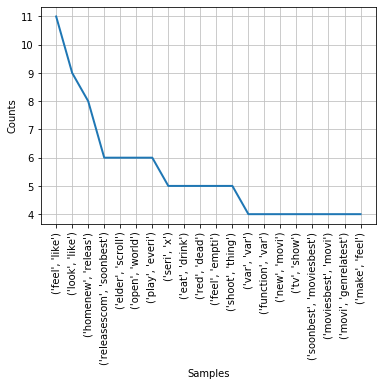

In [64]:
freq = FreqDist(pairs)
print (freq.most_common(20))
freq.plot(20, cumulative=False)

In [56]:
trigrams=list(nltk.trigrams(stemmed_word))
print(trigrams)

[('read', 'submit', 'page'), ('submit', 'page', '2'), ('page', '2', 'var'), ('2', 'var', 'var'), ('var', 'var', 'config'), ('var', 'config', 'fals'), ('config', 'fals', 'ifram'), ('fals', 'ifram', 'soon'), ('ifram', 'soon', 'readi'), ('soon', 'readi', 'function'), ('readi', 'function', 'onreadi'), ('function', 'onreadi', 'onreadi'), ('onreadi', 'onreadi', 'var'), ('onreadi', 'var', 'opt'), ('var', 'opt', 'categori'), ('opt', 'categori', 'need'), ('categori', 'need', 'check'), ('need', 'check', 'allow'), ('check', 'allow', 'current'), ('allow', 'current', 'state'), ('current', 'state', 'categori'), ('state', 'categori', 'var'), ('categori', 'var', 'checkstat'), ('var', 'checkstat', 'function'), ('checkstat', 'function', 'var'), ('function', 'var', 'obj'), ('var', 'obj', 'social'), ('obj', 'social', 'els'), ('social', 'els', 'wait'), ('els', 'wait', 'readi'), ('wait', 'readi', 'fire'), ('readi', 'fire', 'callback'), ('fire', 'callback', 'function'), ('callback', 'function', 'add'), ('fun

[(('releasescom', 'soonbest', 'moviesbest'), 4), (('soonbest', 'moviesbest', 'movi'), 4), (('moviesbest', 'movi', 'genrelatest'), 4), (('open', 'world', 'rpg'), 4), (('movi', 'genrelatest', 'trailersback'), 3), (('red', 'dead', 'redempt'), 3), (('look', 'like', 'absolut'), 3), (('stand', 'way', 'hear'), 3), (('homenew', 'releasescom', 'soonbest'), 2), (('make', 'feel', 'like'), 2), (('feel', 'like', 'miss'), 2), (('like', 'miss', 'anyon'), 2), (('miss', 'anyon', 'say'), 2), (('anyon', 'say', 'enjoy'), 2), (('say', 'enjoy', 'either'), 2), (('enjoy', 'either', 'lie'), 2), (('either', 'lie', 'deep'), 2), (('lie', 'deep', 'clunki'), 2), (('deep', 'clunki', 'horrid'), 2), (('clunki', 'horrid', 'npc'), 2)]


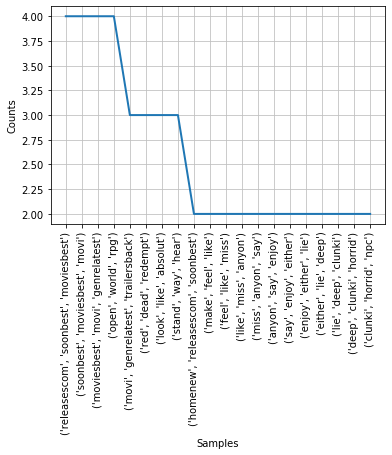

In [65]:
freq = FreqDist(trigrams)
print (freq.most_common(20))
freq.plot(20, cumulative=False)

# Sentiment analisys

In [66]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\lsosa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [67]:
from nltk.corpus import sentiwordnet as swn 

In [84]:
#FIRST WE USE THE WHOLE CLEAN TEXT stemmed_word
post_words=pos_tag(stemmed_word)

NN - is noun

VBP - verb

JJ - Adjective

In sentiwordnet:

Nouns are tagged as 'n'.
Verbs are tagged as 'v'.
adjectives are tagged as 'a'
This exactly what we have done before to obtain the polarity of each word in a sentence:

how to obtain polarities of a word
happy = swn.senti_synsets('happy', 'a')
happy0 = list(happy)[0]
happy0.pos_score()

In [120]:
print ("pos score: ") 
happy = swn.senti_synsets('sad', 'a')
happy0 = list(happy)[0]
print(happy0.pos_score())
print ("neg score: ")
print(happy0.neg_score())
print ("obj score: ")
print(happy0.obj_score())

pos score: 
0.125
neg score: 
0.75
obj score: 
0.125


In [93]:
#WE ARE GONNA TAKE ONLY NN, VBP AND JJ WORDS
post_words_clean=post_words
for clean in post_words:
    if clean[1] not in ['NN','VBP','JJ']:
        post_words_clean.remove(clean)
print(post_words_clean)

[('read', 'JJ'), ('submit', 'NN'), ('page', 'NN'), ('var', 'NN'), ('var', 'NN'), ('config', 'NN'), ('ifram', 'VBP'), ('readi', 'JJ'), ('function', 'NN'), ('onreadi', 'JJ'), ('var', 'NN'), ('opt', 'NN'), ('categori', 'VBP'), ('current', 'JJ'), ('state', 'NN'), ('categori', 'NN'), ('var', 'NN'), ('checkstat', 'NN'), ('function', 'NN'), ('obj', 'JJ'), ('social', 'JJ'), ('wait', 'VBP'), ('readi', 'JJ'), ('fire', 'NN'), ('callback', 'NN'), ('function', 'NN'), ('script', 'JJ'), ('page', 'NN'), ('function', 'NN'), ('googletag', 'NN'), ('cmd', 'NN'), ('queue', 'NN'), ('init', 'NN'), ('disabl', 'NN'), ('initi', 'JJ'), ('load', 'NN'), ('var', 'NN'), ('onerror', 'NN'), ('setinterv', 'JJ'), ('max', 'NN'), ('error', 'NN'), ('page', 'NN'), ('var', 'NN'), ('text', 'JJ'), ('return', 'NN'), ('parti', 'NN'), ('script', 'NN'), ('error', 'NN'), ('load', 'NN'), ('timeout', 'NN'), ('var', 'NN'), ('function', 'NN'), ('new', 'JJ'), ('tri', 'VBP'), ('doc', 'JJ'), ('dom', 'NN'), ('doc', 'NN'), ('j', 'NN'), ('ad

In [112]:
#LET´S CHECK THE WHOLE TEXT
possitive=0.0
for word in post_words:
    print (word[1])
    if word[1]=='NN':
        sent=swn.senti_synsets(word[0],'n')
    if word[1]=='VBP':
        sent=swn.senti_synsets(word[0],'v')
    if word[1]=='JJ':
        sent=swn.senti_synsets(word[0],'a')
    
    print(list(sent))   
    #possitive =possitive+sent0.pos_score()
    
print('overall possitive: ',possitive)

JJ
[]
NN
[]
NN
[SentiSynset('page.n.01'), SentiSynset('page.n.02'), SentiSynset('page.n.03'), SentiSynset('page.n.04'), SentiSynset('page.n.05'), SentiSynset('page.n.06')]
NN
[SentiSynset('volt-ampere.n.01')]
NN
[SentiSynset('volt-ampere.n.01')]
NN
[]
VBP
[]
JJ
[]
NN
[SentiSynset('function.n.01'), SentiSynset('function.n.02'), SentiSynset('function.n.03'), SentiSynset('function.n.04'), SentiSynset('function.n.05'), SentiSynset('affair.n.03'), SentiSynset('routine.n.03')]
JJ
[]
NN
[SentiSynset('volt-ampere.n.01')]
NN
[]
VBP
[]
JJ
[SentiSynset('current.a.01')]
NN
[SentiSynset('state.n.01'), SentiSynset('state.n.02'), SentiSynset('state.n.03'), SentiSynset('state.n.04'), SentiSynset('state_of_matter.n.01'), SentiSynset('state.n.06'), SentiSynset('country.n.02'), SentiSynset('department_of_state.n.01')]
NN
[]
NN
[SentiSynset('volt-ampere.n.01')]
NN
[]
NN
[SentiSynset('function.n.01'), SentiSynset('function.n.02'), SentiSynset('function.n.03'), SentiSynset('function.n.04'), SentiSynset('fun

[SentiSynset('take.v.01'), SentiSynset('take.v.02'), SentiSynset('lead.v.01'), SentiSynset('take.v.04'), SentiSynset('assume.v.03'), SentiSynset('take.v.06'), SentiSynset('bring.v.01'), SentiSynset('take.v.08'), SentiSynset('take.v.09'), SentiSynset('choose.v.01'), SentiSynset('accept.v.02'), SentiSynset('fill.v.04'), SentiSynset('consider.v.03'), SentiSynset('necessitate.v.01'), SentiSynset('take.v.15'), SentiSynset('film.v.01'), SentiSynset('remove.v.01'), SentiSynset('consume.v.02'), SentiSynset('take.v.19'), SentiSynset('take.v.20'), SentiSynset('take.v.21'), SentiSynset('assume.v.05'), SentiSynset('accept.v.05'), SentiSynset('take.v.24'), SentiSynset('learn.v.04'), SentiSynset('claim.v.05'), SentiSynset('take.v.27'), SentiSynset('aim.v.01'), SentiSynset('take.v.29'), SentiSynset('carry.v.02'), SentiSynset('lease.v.04'), SentiSynset('subscribe.v.05'), SentiSynset('take.v.33'), SentiSynset('take.v.34'), SentiSynset('take.v.35'), SentiSynset('claim.v.04'), SentiSynset('accept.v.08'),

VBP
[SentiSynset('wait.v.01'), SentiSynset('wait.v.02'), SentiSynset('expect.v.03'), SentiSynset('wait.v.04')]
NN
[SentiSynset('player.n.01'), SentiSynset('musician.n.01'), SentiSynset('actor.n.01'), SentiSynset('player.n.04'), SentiSynset('player.n.05')]
NN
[SentiSynset('dick.n.01'), SentiSynset('cock.n.01')]
NN
[]
NN
[]
NN
[SentiSynset('man.n.01'), SentiSynset('serviceman.n.01'), SentiSynset('man.n.03'), SentiSynset('homo.n.02'), SentiSynset('man.n.05'), SentiSynset('man.n.06'), SentiSynset('valet.n.01'), SentiSynset('man.n.08'), SentiSynset('man.n.09'), SentiSynset('man.n.10'), SentiSynset('world.n.08')]
JJ
[]
NN
[SentiSynset('killing.n.02'), SentiSynset('kill.n.02')]
JJ
[]
JJ
[]
NN
[]
NN
[SentiSynset('pain.n.01'), SentiSynset('pain.n.02'), SentiSynset('pain.n.03'), SentiSynset('pain.n.04'), SentiSynset('annoyance.n.04')]
JJ
[]
NN
[SentiSynset('universe.n.01'), SentiSynset('world.n.02'), SentiSynset('world.n.03'), SentiSynset('earth.n.01'), SentiSynset('populace.n.01'), SentiSynset(

[SentiSynset('long.a.01'), SentiSynset('long.a.02'), SentiSynset('long.s.03'), SentiSynset('retentive.a.01'), SentiSynset('long.a.05'), SentiSynset('long.a.06'), SentiSynset('long.s.07'), SentiSynset('farseeing.s.02'), SentiSynset('long.s.09')]
JJ
[SentiSynset('dead.a.01'), SentiSynset('dead.a.02'), SentiSynset('all_in.s.01'), SentiSynset('dead.s.04'), SentiSynset('dead.s.05'), SentiSynset('dead.s.06'), SentiSynset('dead.s.07'), SentiSynset('dead.s.08'), SentiSynset('dead.s.09'), SentiSynset('dead.s.10'), SentiSynset('dead.s.11'), SentiSynset('dead.s.12'), SentiSynset('dead.s.13'), SentiSynset('dead.s.14'), SentiSynset('dead.s.15'), SentiSynset('dead.s.16'), SentiSynset('dead.s.17')]
NN
[]
NN
[SentiSynset('player.n.01'), SentiSynset('musician.n.01'), SentiSynset('actor.n.01'), SentiSynset('player.n.04'), SentiSynset('player.n.05')]
NN
[]
JJ
[]
NN
[SentiSynset('interest.n.01'), SentiSynset('sake.n.01'), SentiSynset('interest.n.03'), SentiSynset('interest.n.04'), SentiSynset('interest.n.

In [3]:
L=[2,3,5,7,11]

In [5]:
print(L[::-1])

[11, 7, 5, 3, 2]


In [7]:
numbers={'one':1,'two':2,'three':3}